In [16]:
from nltk import word_tokenize, pos_tag, RegexpParser

In [39]:
sent = "I spent five years studying Computer Science at The George Washington University."

In [23]:
# # Lemmatize to resolve contractions - https://stackoverflow.com/a/19790512
# from nltk.stem import PorterStemmer
# p = PorterStemmer()

In [40]:
# Tokenize the sentence and perform Part of Speech tagging

pos_tagged_tokens = pos_tag(word_tokenize(sent))
pos_tagged_tokens

[('I', 'PRP'),
 ('spent', 'VBD'),
 ('five', 'CD'),
 ('years', 'NNS'),
 ('studying', 'VBG'),
 ('Computer', 'NNP'),
 ('Science', 'NN'),
 ('at', 'IN'),
 ('The', 'DT'),
 ('George', 'NNP'),
 ('Washington', 'NNP'),
 ('University', 'NNP'),
 ('.', '.')]

In [36]:
# "Chunk" the tokens into larger sequences - http://www.nltk.org/book/ch07.html

grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = RegexpParser(grammar)
result = cp.parse(pos_tagged_tokens)
print(result)

(S
  I/PRP
  spent/VBD
  five/CD
  years/NNS
  studying/VBG
  Computer/NNP
  (NP Science/NN)
  at/IN
  the/DT
  George/NNP
  Washington/NNP
  University/NNP
  ./.)


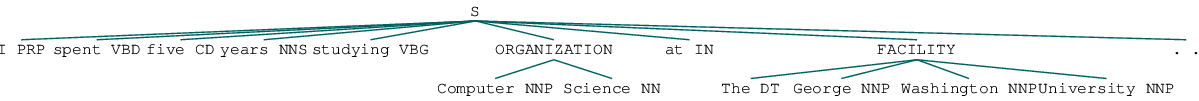

In [41]:
nltk.ne_chunk(pos_tagged_tokens)